In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

In [2]:
voice_data = pd.read_csv('voice_gender.zip')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [4]:
voice_data.isnull().sum().sum()

0

In [6]:
X = voice_data.drop('label', axis=1)
y = voice_data['label']

In [7]:
# Формируем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


In [10]:
y_train.value_counts()

label
male      1267
female    1267
Name: count, dtype: int64

[Text(0.5, 0.75, 'meanfun <= 0.142\nentropy = 1.0\nsamples = 2534\nvalue = [1267, 1267]'),
 Text(0.25, 0.25, 'entropy = 0.313\nsamples = 1296\nvalue = [73, 1223]'),
 Text(0.75, 0.25, 'entropy = 0.221\nsamples = 1238\nvalue = [1194, 44]')]

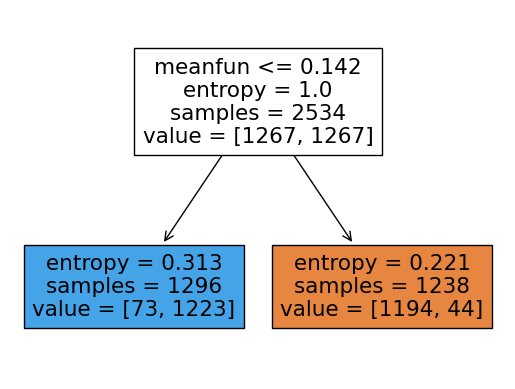

In [8]:
# Инициализируем модель дерева решений с максимальной глубиной 1 и обучаем ее
dt = tree.DecisionTreeClassifier(
    max_depth=1, #глубина
    criterion='entropy', #критерий информативности
    random_state=0 #генератор случайных чисел
)
dt.fit(X_train, y_train)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X_train.columns.tolist(), #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
)

In [11]:
1296 / 2534 * 100

51.14443567482242

In [12]:
y_pred = dt.predict(X_test)
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

      female      0.965     0.946     0.955       317
        male      0.947     0.965     0.956       317

    accuracy                          0.956       634
   macro avg      0.956     0.956     0.956       634
weighted avg      0.956     0.956     0.956       634



[Text(0.5, 0.8333333333333334, 'meanfun <= 0.142\nentropy = 1.0\nsamples = 2534\nvalue = [1267, 1267]\nclass = female'),
 Text(0.25, 0.5, 'IQR <= 0.074\nentropy = 0.313\nsamples = 1296\nvalue = [73, 1223]\nclass = male'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.972\nsamples = 82\nvalue = [49, 33]\nclass = female'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.14\nsamples = 1214\nvalue = [24, 1190]\nclass = male'),
 Text(0.75, 0.5, 'Q25 <= 0.157\nentropy = 0.221\nsamples = 1238\nvalue = [1194, 44]\nclass = female'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.575\nsamples = 293\nvalue = [253, 40]\nclass = female'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.039\nsamples = 945\nvalue = [941, 4]\nclass = female')]

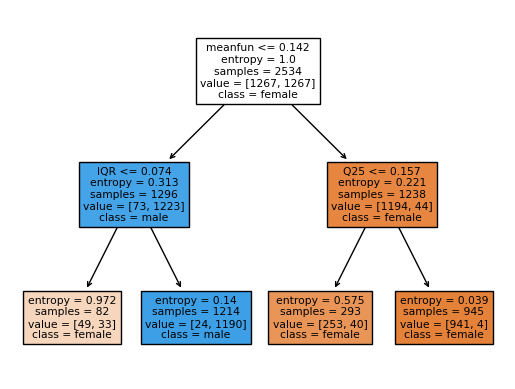

In [15]:
# Инициализируем модель дерева решений с максимальной глубиной 2 и обучаем ее
dt = tree.DecisionTreeClassifier(
    max_depth=2, #глубина
    criterion='entropy', #критерий информативности
    random_state=0 #генератор случайных чисел
)
dt.fit(X_train, y_train)
# Визуализируем дерево решений в виде графа
class_names_list = np.array(['female', 'male']).tolist()
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X_train.columns.tolist(), #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
    class_names=class_names_list
)

In [16]:
y_pred = dt.predict(X_test)
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

      female      0.948     0.978     0.963       317
        male      0.977     0.946     0.962       317

    accuracy                          0.962       634
   macro avg      0.963     0.962     0.962       634
weighted avg      0.963     0.962     0.962       634



Глубина дерева решения: 12
Количество листьев в дереве решений: 54


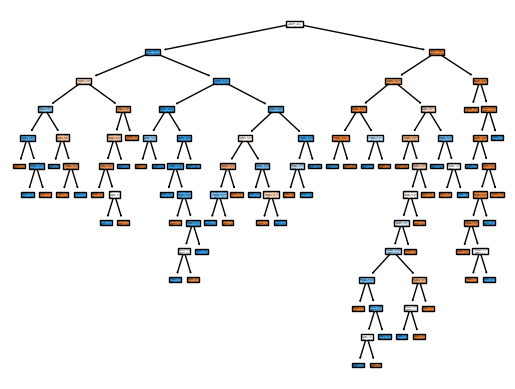

In [17]:
# Инициализируем модель дерева решений с максимальной глубиной  и обучаем ее
dt = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=0 #генератор случайных чисел
)
dt.fit(X_train, y_train)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X_train.columns.tolist(), #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
)
print("Глубина дерева решения:", dt.get_depth())
print("Количество листьев в дереве решений:", dt.get_n_leaves())

In [18]:
print(metrics.classification_report(y_train, dt.predict(X_train), digits=3))
print(metrics.classification_report(y_test, dt.predict(X_test), digits=3))

              precision    recall  f1-score   support

      female      1.000     1.000     1.000      1267
        male      1.000     1.000     1.000      1267

    accuracy                          1.000      2534
   macro avg      1.000     1.000     1.000      2534
weighted avg      1.000     1.000     1.000      2534

              precision    recall  f1-score   support

      female      0.978     0.968     0.973       317
        male      0.969     0.978     0.973       317

    accuracy                          0.973       634
   macro avg      0.973     0.973     0.973       634
weighted avg      0.973     0.973     0.973       634



In [19]:
# Создание экземпляра модели дерева решений
dt = tree.DecisionTreeClassifier(random_state=0)

# Задание сетки параметров
param_grid = {
    'criterion': ['gini', 'entropy'],  # критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10],  # максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10]  # минимальное количество объектов, необходимое для сплита
}

# Задание метода кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)

# Создание экземпляра GridSearchCV
grid_search = model_selection.GridSearchCV(estimator=dt, param_grid=param_grid, scoring='accuracy', cv=cv)
# Выполнение поиска по сетке
grid_search.fit(X_train, y_train)

# Получение наилучших параметров и оценки
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Вывод результатов
print("Наилучшие параметры:", best_params)
print("Лучшая оценка (accuracy):", best_score)


Наилучшие параметры: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}
Лучшая оценка (accuracy): 0.9656687793811539


[Text(0.5262096774193549, 0.9375, 'meanfun <= 0.142\ngini = 0.5\nsamples = 2534\nvalue = [1267, 1267]'),
 Text(0.28830645161290325, 0.8125, 'IQR <= 0.074\ngini = 0.106\nsamples = 1296\nvalue = [73, 1223]'),
 Text(0.12903225806451613, 0.6875, 'meanfun <= 0.13\ngini = 0.481\nsamples = 82\nvalue = [49, 33]'),
 Text(0.06451612903225806, 0.5625, 'sfm <= 0.438\ngini = 0.424\nsamples = 36\nvalue = [11, 25]'),
 Text(0.03225806451612903, 0.4375, 'dfrange <= 0.406\ngini = 0.159\nsamples = 23\nvalue = [2, 21]'),
 Text(0.016129032258064516, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.04838709677419355, 0.3125, 'dfrange <= 7.398\ngini = 0.087\nsamples = 22\nvalue = [1, 21]'),
 Text(0.03225806451612903, 0.1875, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.06451612903225806, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.0967741935483871, 0.4375, 'kurt <= 7.539\ngini = 0.426\nsamples = 13\nvalue = [9, 4]'),
 Text(0.08064516129032258, 0.3125, 'gini = 0.0\nsamples 

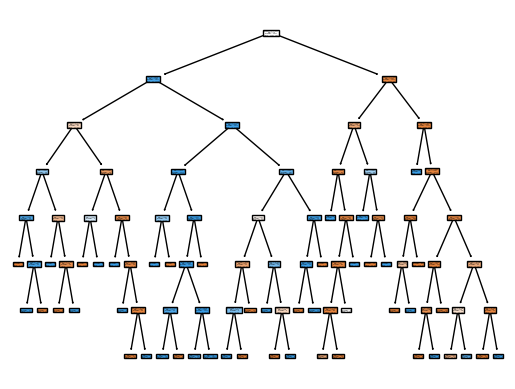

In [20]:
# Инициализируем модель дерева решений с максимальной глубиной  и обучаем ее
dt = tree.DecisionTreeClassifier(
    criterion='gini', #критерий информативности
    max_depth=7,
    min_samples_split=3,
    random_state=0 #генератор случайных чисел
)
dt.fit(X_train, y_train)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X_train.columns.tolist(), #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
)

In [21]:
print(metrics.classification_report(y_train, dt.predict(X_train), digits=3))
print(metrics.classification_report(y_test, dt.predict(X_test), digits=3))

              precision    recall  f1-score   support

      female      0.993     0.998     0.996      1267
        male      0.998     0.993     0.996      1267

    accuracy                          0.996      2534
   macro avg      0.996     0.996     0.996      2534
weighted avg      0.996     0.996     0.996      2534

              precision    recall  f1-score   support

      female      0.972     0.968     0.970       317
        male      0.969     0.972     0.970       317

    accuracy                          0.970       634
   macro avg      0.970     0.970     0.970       634
weighted avg      0.970     0.970     0.970       634



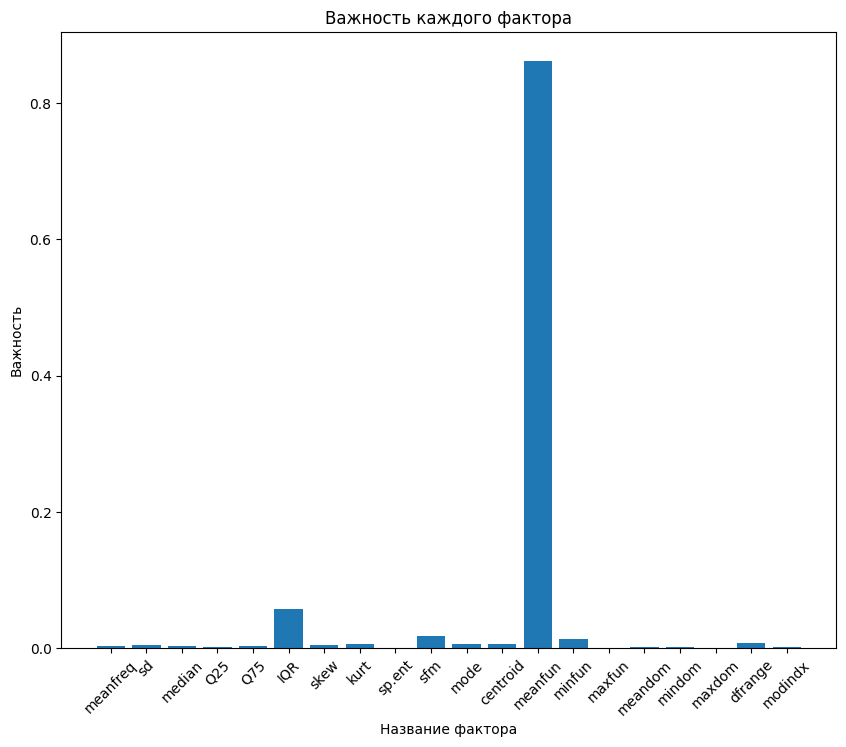

In [22]:
# Получение важности факторов из обученной модели
feature_importance = dt.feature_importances_

# Получение названий факторов (предположим, что они хранятся в переменной feature_names)
feature_names = X_train.columns  # предположим, что названия факторов доступны через столбцы данных

# Создание столбчатой диаграммы
plt.figure(figsize=(10, 8))
plt.bar(feature_names, feature_importance)
plt.xlabel('Название фактора')
plt.ylabel('Важность')
plt.title('Важность каждого фактора')
plt.xticks(rotation=45)  # Поворачиваем названия факторов для лучшей читаемости
plt.show()